<h1><p style="text-align:center">***THE SPARKS FOUNDATION***</p></h1>

<h2><p style="text-align:center">Data Sciecne & Business Analytics Internship (#GRIPMARCH21)</p></h2>

### Created By : Ruchika Gajeshwar

## TASK 2 - Prediction using Unsupervised ML

<h1><p style="text-align:center">Problem Statement:</p></h1>

## Que:  From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

Let’s implement k-means clustering using a famous dataset: the Iris dataset. This dataset contains 3 classes of 50 instances each and each class refers to a type of iris plant. The dataset has four features: sepal length, sepal width, petal length, and petal width. The fifth column is for species, which holds the value for these types of plants. For example, one of the types is a setosa, as shown in the image below.

To start Python coding for k-means clustering, let’s start by importing the required libraries. Apart from NumPy, Pandas, and Matplotlib, we’re also importing KMeans from sklearn.cluster, as shown below.

## <h1><p style="text-align:center"> Step 1:  Importing Required Libraries -</p></h1>


In [64]:
# Python Libraries:
import pandas as pd
import numpy as np


# Libraries for Visualization:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Libraries for Dataset:
from sklearn import datasets


# Libraries for Kmeans:
from sklearn.cluster import KMeans

##  <h1><p style="text-align:center">Step 2 : Reading the Data into Pandas Dataframe- </p></h1>

We’re reading the Iris dataset using the datasets.load_iris() method and storing the data in a data frame iris_df. After populating the data frame iris_df, we use the head(), tail() and sample() method on the dataset to see its first, last and sample 5 records.

In [35]:
# Load the datase

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [36]:
# Checking first 5 rows:

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [37]:
# Checking Last 5 rows:


iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [38]:
# Fetching 5 records at random from the dataset:

iris_df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
142,5.8,2.7,5.1,1.9
147,6.5,3.0,5.2,2.0
95,5.7,3.0,4.2,1.2
10,5.4,3.7,1.5,0.2
7,5.0,3.4,1.5,0.2


In [39]:
# Five Number Summary:

iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


##  <h1><p style="text-align:center"> Step 3: Understanding the Data - </p></h1>



- ### **Datatype Of Columns**

In [40]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


- We can conclude that the datatypes are correctly used as per the requirement of the data.

- ### **Shape Of Data**

In [42]:
iris_df.shape

(150, 4)

- The Iris dataset has 150 rows and 6 columns.

* ### **Null Values**

In [43]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

- There are no null values in the Iris dataset.

##  <h1><p style="text-align:center"> Step 1:  Importing Required Libraries -</p></h1>
 Step 4: Visualizations -

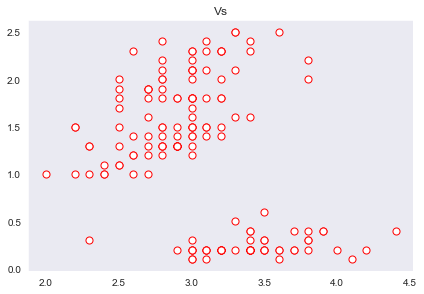

In [46]:
# Do the scatter plot and see that clusters are evident

x = iris.data
y = iris.target

plt.scatter(x[:,1], x[:,3],
             color='white', marker='o', edgecolor='red', s=50)
plt.grid()
plt.tight_layout()
plt.show()

- Now we select all four features (sepal length, sepal width, petal length, and petal width) of the dataset in a variable called x so that we can train our model with these features. For this, we use the iloc function on iris_df, and the column index (0,1,2,3) for the above four columns are used, as shown below:

In [47]:
x = iris_df.iloc[:, [0,1,2,3]].values

- There’s a method called the Elbow method, which is designed to help find the optimal number of clusters in a dataset. So let’s use this method to calculate the optimum value of k. To implement the Elbow method, we need to create some Python code (shown below), and we’ll plot a graph between the number of clusters and the corresponding error value. This graph generally ends up shaped like an elbow, hence its name:

## <h1><p style="text-align:center">Step 5: Find the Optimum number of Clusters using Elbow method / Creating K-Means Classifier -</p></h1>


In [68]:
wcss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

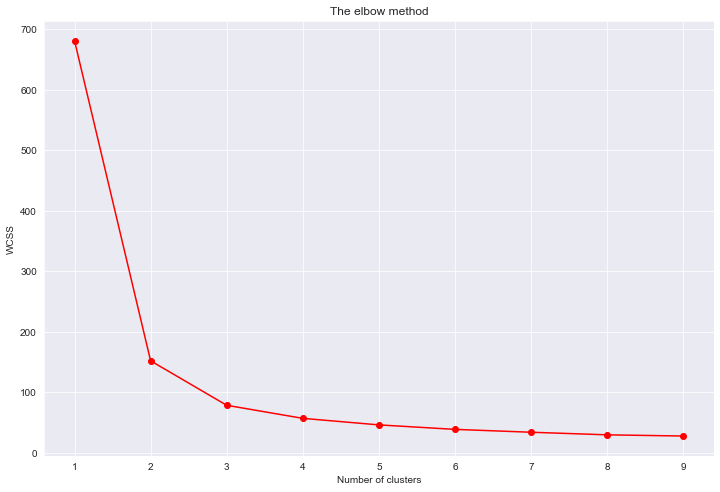

In [69]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'

plt.figure(figsize=(12, 8))
plt.plot(range(1, 10), wcss, 'ro-')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

- As we can see, the optimal value of k is between 2 and 4, as the elbow-like shape is formed at k=3 in the above graph. Let’s implement k-means using k=3


### Implement K-means Clustering with k=3

In [49]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [50]:
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

- Finally, its time to visualize the three clusters that were formed with the optimal k value. We can clearly see three clusters in the image below, with each cluster represented by a different color

### Visualizations Clustering -

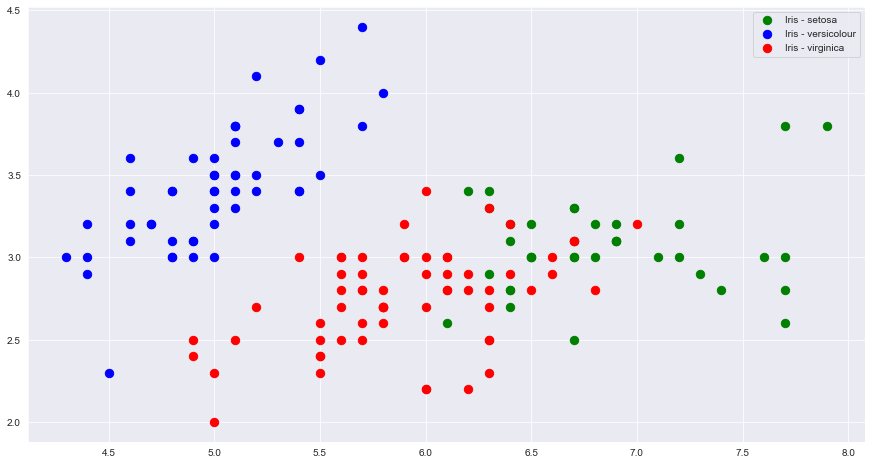

In [60]:
# Visualising the clusters 
# Preferably on the first two columns

plt.figure(figsize=(15,8))
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s = 70, color = 'green', label = 'Iris - setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s = 70, color = 'blue', label = 'Iris - versicolour')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s = 70, color = 'red', label = 'Iris - virginica')
plt.legend()

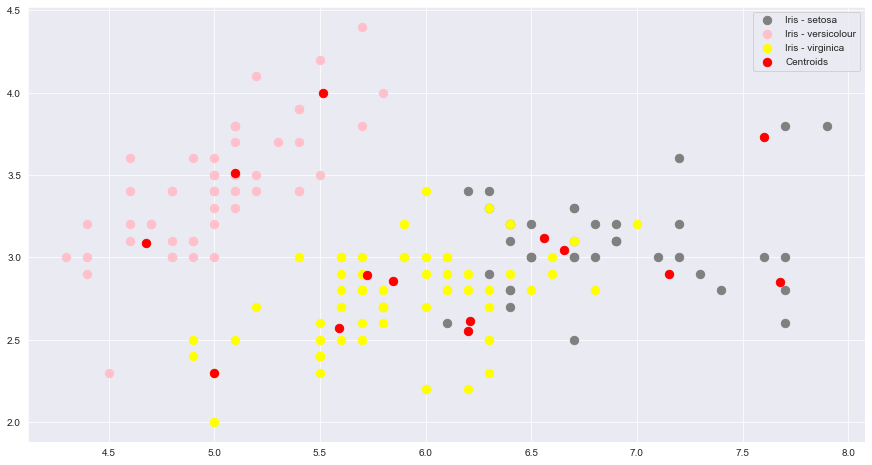

In [63]:
# Plotting centroids of the clusters

plt.figure(figsize=(15,8))
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1],s = 70, color = 'grey', label = 'Iris - setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1],s = 70, color = 'pink', label = 'Iris - versicolour')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1],s = 70, color = 'yellow', label = 'Iris - virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 70, color = 'red', label = 'Centroids')
plt.legend()

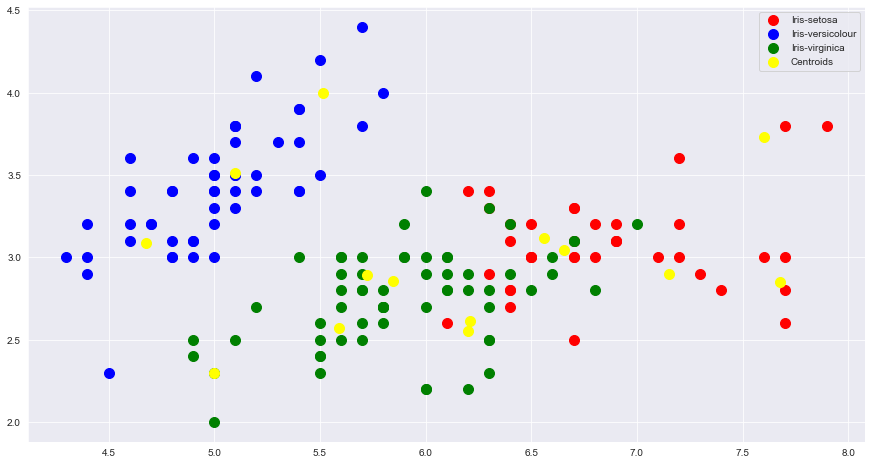

In [66]:
# Visualising the clusters 

plt.figure(figsize=(15,8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

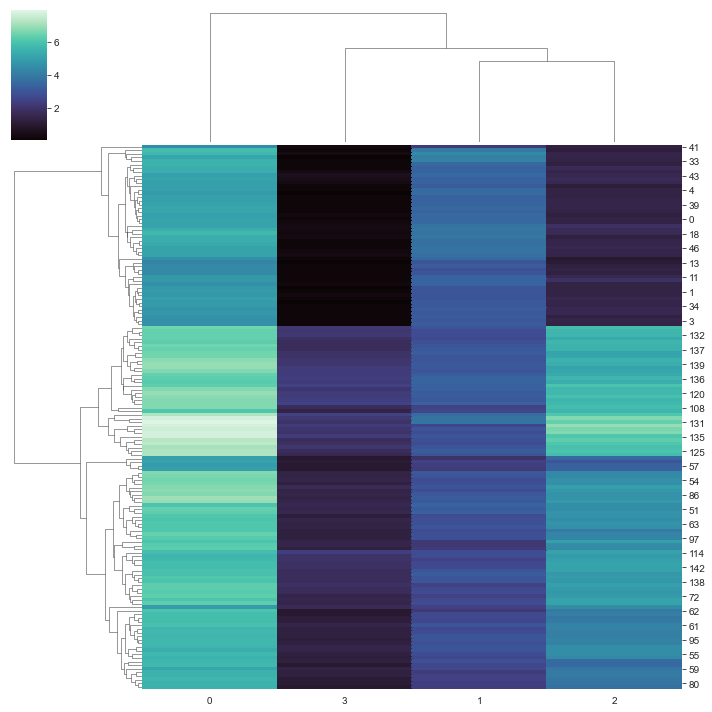

In [70]:
sns.clustermap(x,cmap='mako')

<h1><p style="text-align:center">Thank You!! </p></h1>